# Assignment 2

In [1]:
# Discrete function

import numpy as np
import matplotlib.pyplot as plt

def sirv(B, S_0, I_0, alpha, beta, gamma, delta, t_v, iterations):
    S = [S_0]
    I = [I_0]
    R = [0]
    V = [0]
    k = list(range(iterations+1))
    for t in k[1:]:
        infected = min(alpha*S[-1]*I[-1], S[-1])
        recovered = beta*I[-1]
        susceptibled = gamma*R[-1]
        vacc_S, vacc_R = 0, 0
        if t >= t_v:
            vacc_S = delta*S[-1]
            vacc_R = delta*R[-1]
        I_t = I[-1] + infected - recovered
        R_t = R[-1] + recovered - susceptibled - vacc_R
        S_t = S[-1] + B - infected + susceptibled - vacc_S
        V_t = V[-1] + vacc_S + vacc_R
        S.append(S_t)
        I.append(I_t)
        R.append(R_t)
        V.append(V_t)
    p = [S[-1],I[-1],R[-1],V[-1]]   # the final output p is meant to check for steady state and technically not part of the model
    return k, S, I, R, V, p  

In [109]:
# General Variables

B, S_0, I_0 = 1, 10000, 100 
alpha, beta, gamma, delta = 1e-4, 0.5, 0.0625, 0.01
t_v, iterations = 120, 320

[1475.5537704954625,
 3.3117433924921373e-13,
 0.09019876309367385,
 8944.356030741446]

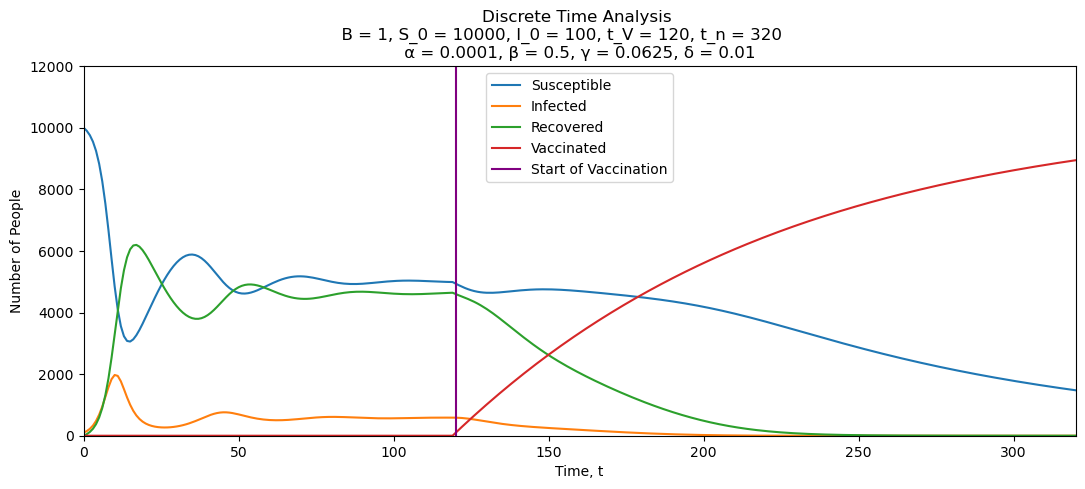

In [110]:
# Discrete Time Plot

k, S, I, R, V, p = sirv(B, S_0, I_0, alpha, beta, gamma, delta, t_v, iterations)
fig = plt.figure(figsize=(12.8, 4.8))
plt.plot(k,S,label='Susceptible')
plt.plot(k,I,label='Infected')
plt.plot(k,R,label='Recovered')
plt.plot(k,V,label='Vaccinated')
plt.axvline(x = t_v, color='purple', label='Start of Vaccination')
plt.legend()
plt.title(f'Discrete Time Analysis \n          B = {B}, S_0 = {S_0}, I_0 = {I_0}, t_V = {t_v}, t_n = {iterations} \
                \n α = {alpha}, β = {beta}, γ = {gamma}, δ = {delta} ')
plt.xlabel('Time, t')
plt.ylabel('Number of People')
plt.axis([k[0], k[-1], 0, 12e3])
p

In [111]:
# Continuous time function

def eulerdt(df, y_0, t_0, h, var, t_v, iterations):
    t = np.zeros(iterations+1)
    y = np.zeros(shape=(len(y_0), iterations+1))
    abgd = var[:-1] + [0]
    t[0], y[:, 0] = t_0, y_0
    for i in range(iterations):
        if i >= int(t_v//h):
            abgd = var
        t[i+1] = t[i] + h
        y[:, i+1] = y[:, i] + h*df(t[i], y[:, i], abgd)  
    p = y[:, -1]                    # p is here for same reasons as previous
    return t, y, p

def RK2_next(df, y, t, h, b, var):
    if b == 0:
        a, alpha, beta = 1, 1, 1
    else:
        a, alpha, beta = 1-b, 1/2/b, 1/2/b
    k1 = df(t, y, var)
    k2 = df(t+alpha*h, y+beta*k1*h, var)
    return y + h*(a*k1 + b*k2)

def RK2dt(df, y_0, t_0, h, b, var, t_v, iterations):
    t = np.zeros(iterations+1)
    y = np.zeros(shape=(len(y_0), iterations+1))
    abgd = var[:-1] + [0]
    t[0], y[:, 0] = t_0, y_0
    for i in range(iterations):
        if i >= int(t_v//h):
            abgd = var
        t[i+1] = t[i] + h
        y[:, i+1] = RK2_next(df, y[:, i], t[i], h, b, abgd)
    p = y[:, -1]     # p is here for same reasons as previous
    return t, y, p

In [116]:
# Additional variables for Continuous Time Analysis

var = [alpha, beta, gamma, delta]
t_0, h = 0, 0.1
R_0, V_0 = 0, 0
iter_cont = int(iterations//h)
sirv0 = np.array([S_0, I_0, R_0, V_0])
dsdt = lambda t, A, var: B - min(var[0]*A[0]*A[1], A[0]) + var[2]*A[2] - var[3]*A[0]
didt = lambda t, A, var: min(var[0]*A[0]*A[1], A[0]) - var[1]*A[1]
drdt = lambda t, A, var: var[1]*A[1] - var[2]*A[2] - var[3]*A[2]
dvdt = lambda t, A, var: var[3]*A[0] + var[3]*A[2]
dsirvdt = lambda t, A, var: np.array([dsdt(t, A, var), didt(t, A, var), drdt(t, A, var), dvdt(t, A, var)])

array([1.50173796e+03, 2.84863877e-11, 1.32662577e-01, 8.91802937e+03])

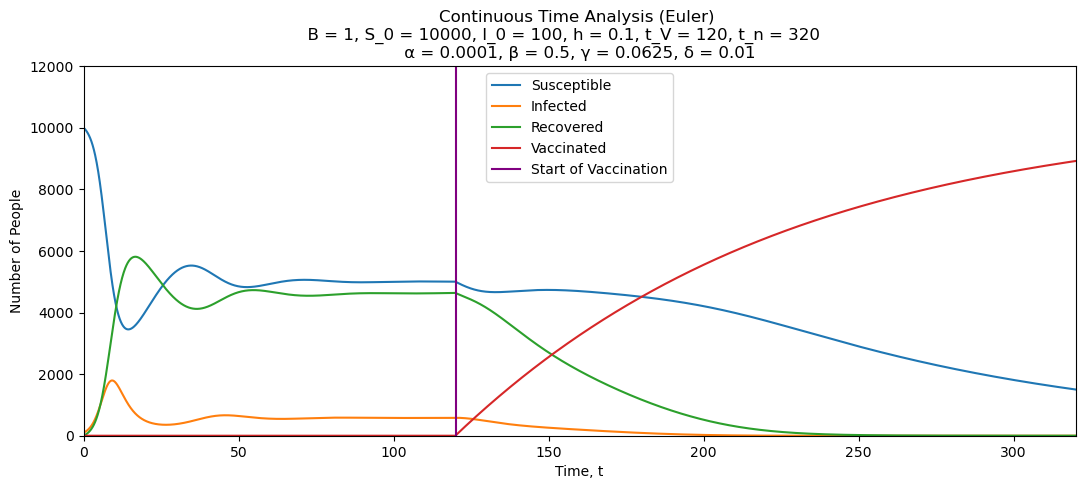

In [117]:
# Euler plot

t, (s, i, r, v), p = eulerdt(dsirvdt, sirv0, t_0, h, var, t_v, iter_cont)
fig = plt.figure(figsize=(12.8, 4.8))
plt.plot(t, s, label='Susceptible')
plt.plot(t, i, label='Infected')
plt.plot(t, r, label='Recovered')
plt.plot(t, v, label='Vaccinated')
plt.axvline(x = t_v, color='purple', label='Start of Vaccination')
plt.legend()
plt.title(f'Continuous Time Analysis (Euler) \n      B = {B}, S_0 = {S_0}, I_0 = {I_0}, h = {h}, t_V = {t_v}, t_n = {iterations}\
            \n α = {alpha}, β = {beta}, γ = {gamma}, δ = {delta} ')
plt.xlabel('Time, t')
plt.ylabel('Number of People')
plt.axis([k[0], k[-1], 0, 12e3])
p

array([1.50308681e+03, 4.09634783e-11, 1.37092612e-01, 8.91667610e+03])

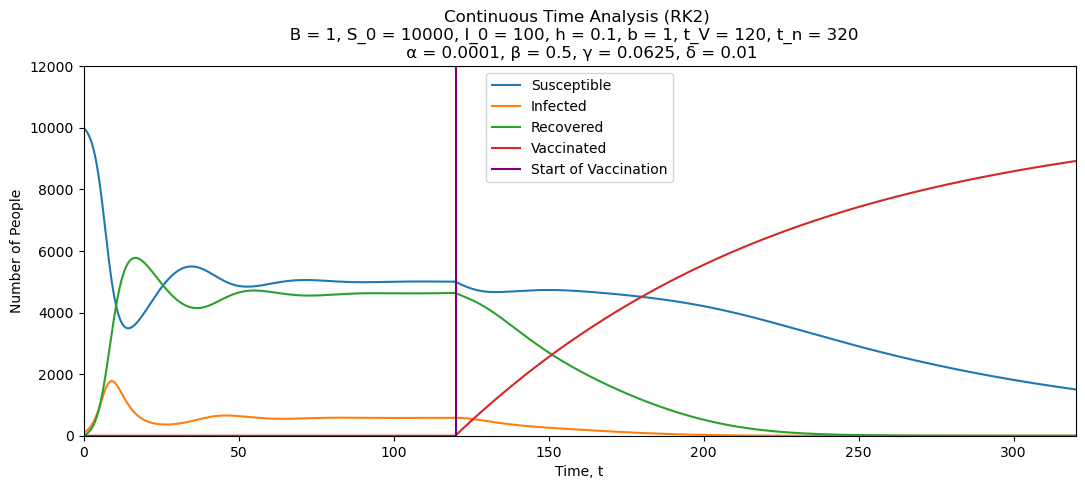

In [119]:
# RK2 plot
b = 1
t, (s, i, r, v), p = RK2dt(dsirvdt, sirv0, t_0, h, b, var, t_v, iter_cont)
fig = plt.figure(figsize=(12.8, 4.8))
plt.plot(t, s, label='Susceptible')
plt.plot(t, i, label='Infected')
plt.plot(t, r, label='Recovered')
plt.plot(t, v, label='Vaccinated')
plt.axvline(x = t_v, color='purple', label='Start of Vaccination')
plt.legend()
plt.title(f'Continuous Time Analysis (RK2) \n               B = {B}, S_0 = {S_0}, I_0 = {I_0}, h = {h}, b = {b}, t_V = {t_v}, t_n = {iterations} \
                \n α = {alpha}, β = {beta}, γ = {gamma}, δ = {delta}')
plt.xlabel('Time, t')
plt.ylabel('Number of People')
plt.axis([k[0], k[-1], 0, 12e3])
p